## Beta Computation

In [65]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import yfinance as yf
import math as mt
import statistics as st
from datetime import datetime
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats

plt.style.use('seaborn-v0_8-darkgrid')

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [67]:
class stock:
    def __init__(self, ticker, time):
        self.ticker = ticker 
        self.time = time
        
    def chart(self):
        return yf.download(self.ticker, period=self.time)

In [68]:
ftse = stock("^FTSE", "5Y").chart()

[*********************100%***********************]  1 of 1 completed


In [69]:
ftse.describe()

Open         High          Low        Close    Adj Close  \
count  1261.000000  1261.000000  1261.000000  1261.000000  1261.000000   
mean   7076.170265  7120.780818  7030.029746  7075.931644  7075.931644   
std     554.670616   543.165357   566.198426   554.561847   554.561847   
min    4993.899902  5181.000000  4898.799805  4993.899902  4993.899902   
25%    6885.299805  6938.299805  6836.100098  6885.299805  6885.299805   
50%    7211.600098  7250.100098  7170.299805  7211.600098  7211.600098   
75%    7466.100098  7502.700195  7422.899902  7465.899902  7465.899902   
max    8014.299805  8047.100098  7995.500000  8014.299805  8014.299805   

             Volume  
count  1.261000e+03  
mean   8.092579e+08  
std    2.986690e+08  
min    8.378200e+06  
25%    6.323474e+08  
50%    7.458418e+08  
75%    9.033015e+08  
max    2.585566e+09

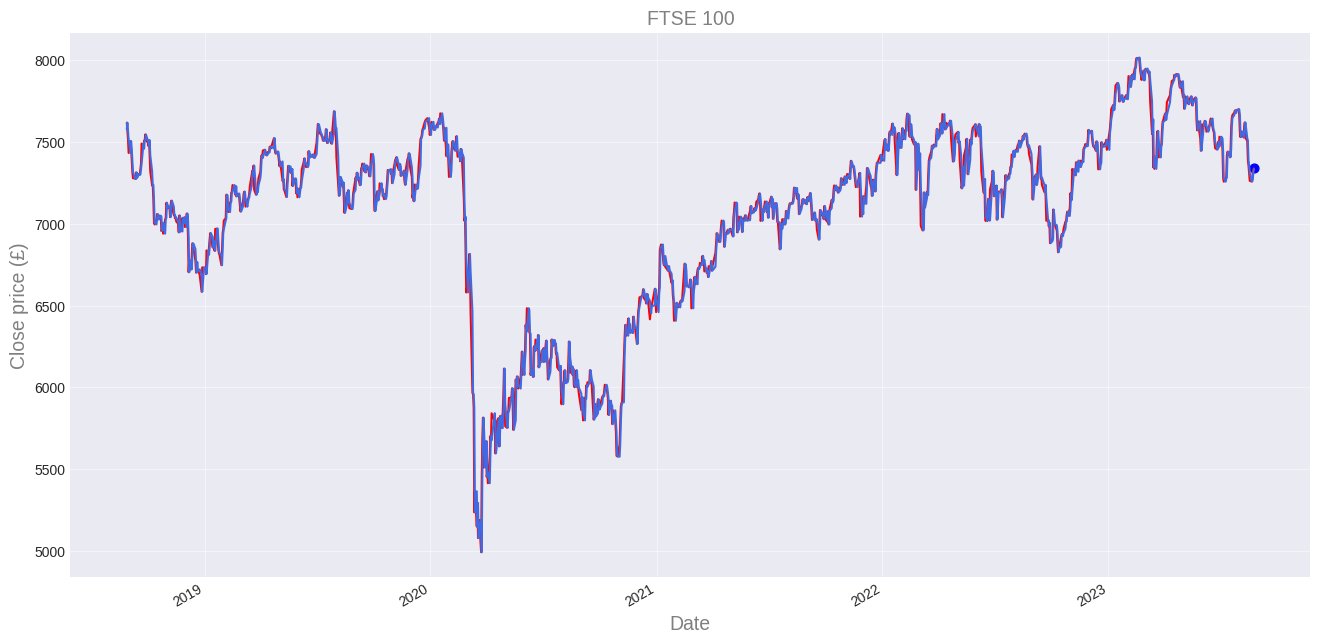

In [70]:
plt.figure(figsize=(16,8))
ftse.Close.plot(color="red")
ftse.Open.plot(color="royalblue")
plt.scatter(ftse.index[-1], ftse.Close[-1], s=40, color="blue")
plt.grid(True, alpha=0.5)
plt.title("FTSE 100", fontsize=14, color="grey")
plt.ylabel("Close price (£)", fontsize=14, color="grey")
plt.xlabel("Date", fontsize=14, color="grey")
plt.show()

In [71]:
burberry = stock("BRBY.L", "5Y").chart()

[*********************100%***********************]  1 of 1 completed


In [72]:
burberry['Close'] = burberry['Close']/100
burberry['Open'] = burberry['Open']/100

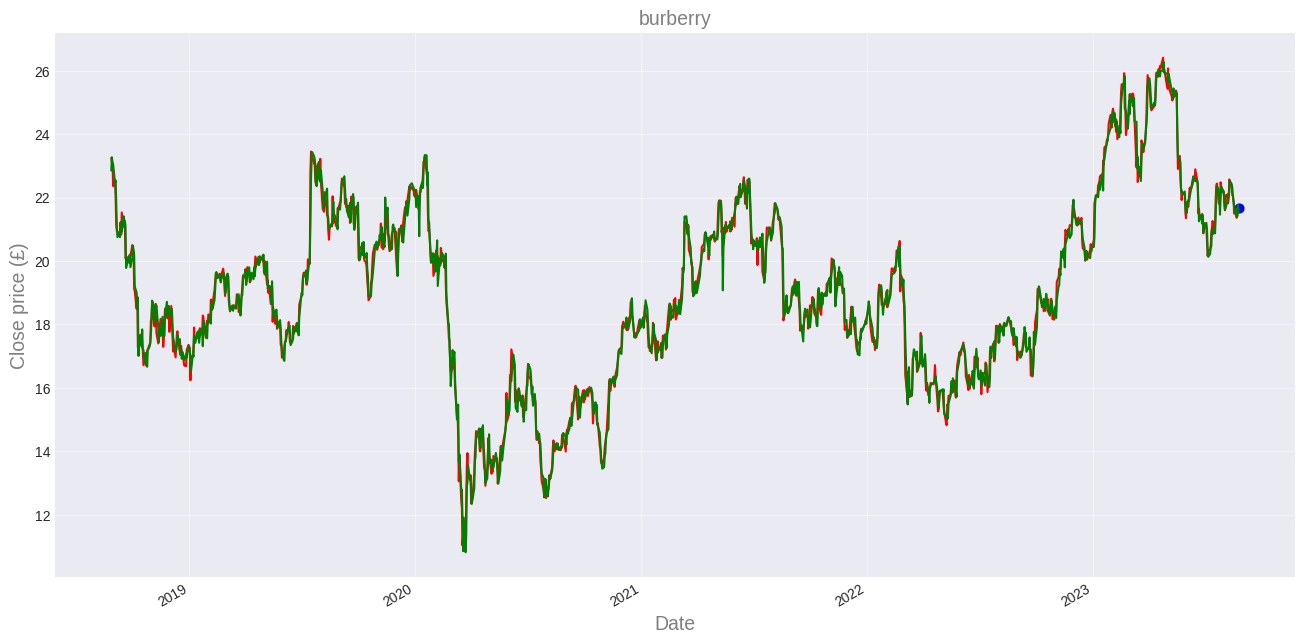

In [73]:
plt.figure(figsize=(16,8))
burberry.Close.plot(color="red")
plt.scatter(burberry.index[-1], burberry.Close[-1], s=40, color="blue")
burberry.Open.plot(color="green")
plt.grid(True, alpha=0.5)
plt.title("burberry", fontsize=14, color="grey")
plt.ylabel("Close price (£)", fontsize=14, color="grey")
plt.xlabel("Date", fontsize=14, color="grey")
plt.show()

In [74]:
burberry.describe()

Open         High          Low        Close    Adj Close  \
count  1262.000000  1262.000000  1262.000000  1262.000000  1262.000000   
mean     18.977413  1923.620838  1871.442005    18.975119  1782.650554   
std       2.853432   283.921110   285.553328     2.855935   292.317541   
min      10.815000  1130.500000  1017.000000    10.850000  1004.167175   
25%      17.180000  1742.625000  1692.625000    17.186250  1592.098724   
50%      18.802500  1905.000000  1854.750000    18.772500  1761.370239   
75%      21.000000  2120.750000  2076.500000    20.987500  1957.560547   
max      26.270000  2656.000000  2617.000000    26.410000  2586.030762   

             Volume  
count  1.262000e+03  
mean   1.586166e+06  
std    8.975734e+05  
min    3.977900e+04  
25%    9.909880e+05  
50%    1.315390e+06  
75%    1.939618e+06  
max    6.396838e+06

In [75]:
data = {"FTSE": ftse.Close,
       "BRBY": burberry.Close}
data = pd.DataFrame(data)
data.tail()

FTSE   BRBY
Date                          
2023-08-21  7257.799805  21.53
2023-08-22  7270.799805  21.36
2023-08-23  7320.500000  21.58
2023-08-24  7333.600098  21.60
2023-08-25  7338.600098  21.67

In [76]:
returns = np.log(data/data.shift(1))
returns.dropna(inplace=True)
returns.tail()

FTSE      BRBY
Date                          
2023-08-21 -0.000634  0.001860
2023-08-22  0.001790 -0.007927
2023-08-23  0.006812  0.010247
2023-08-24  0.001788  0.000926
2023-08-25  0.000682  0.003236

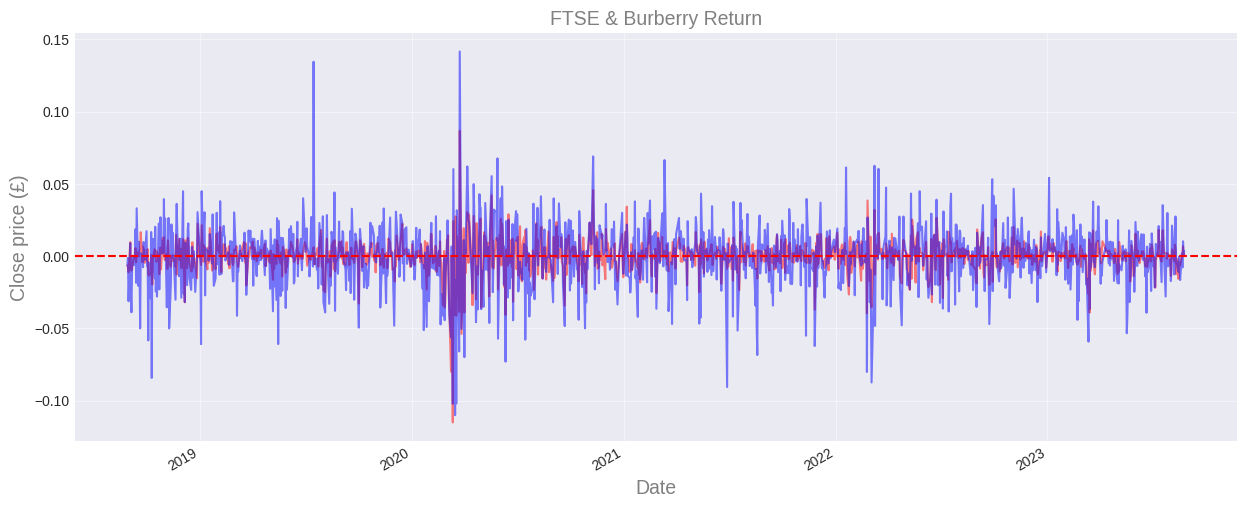

In [77]:
plt.figure(figsize=(15,6))
returns.FTSE.plot(color="red", alpha=0.5)
returns.BRBY.plot(color="blue", alpha=0.5)
plt.grid(True, alpha=0.5)
plt.title("FTSE & Burberry Return", fontsize=14, color="grey")
plt.axhline(0, color="red", linestyle="--")
plt.ylabel("Close price (£)", fontsize=14, color="grey")
plt.xlabel("Date", fontsize=14, color="grey")
plt.show()

In [78]:
ftse_var = returns.FTSE.var()
ftse_var

0.00012771536119711584

In [79]:
returns_cov = returns.cov()
returns_cov

FTSE      BRBY
FTSE  0.000128  0.000161
BRBY  0.000161  0.000482

In [80]:
#FTSE100 and AZN covariance 
st.covariance(returns.FTSE, returns.BRBY)

0.00016112343952096985

In [81]:
beta = st.covariance(returns.FTSE, returns.BRBY)/st.variance(returns.FTSE)

In [82]:
X = returns['FTSE'].values.reshape(-1, 1)
y = returns['BRBY'].values

In [83]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [84]:
print(f"Beta of Burberry : {model.coef_[0]}")

Beta of Burberry : 1.2615823031052038


In [85]:
model.intercept_

-5.0932212547034355e-06

In [86]:
y_pred = model.predict(X)
y_pred[:10]

array([-0.00898058, -0.00790301, -0.01411624,  0.01219109, -0.00788029,
       -0.01268802, -0.0110401 , -0.00714414,  0.00027217, -0.00101066])

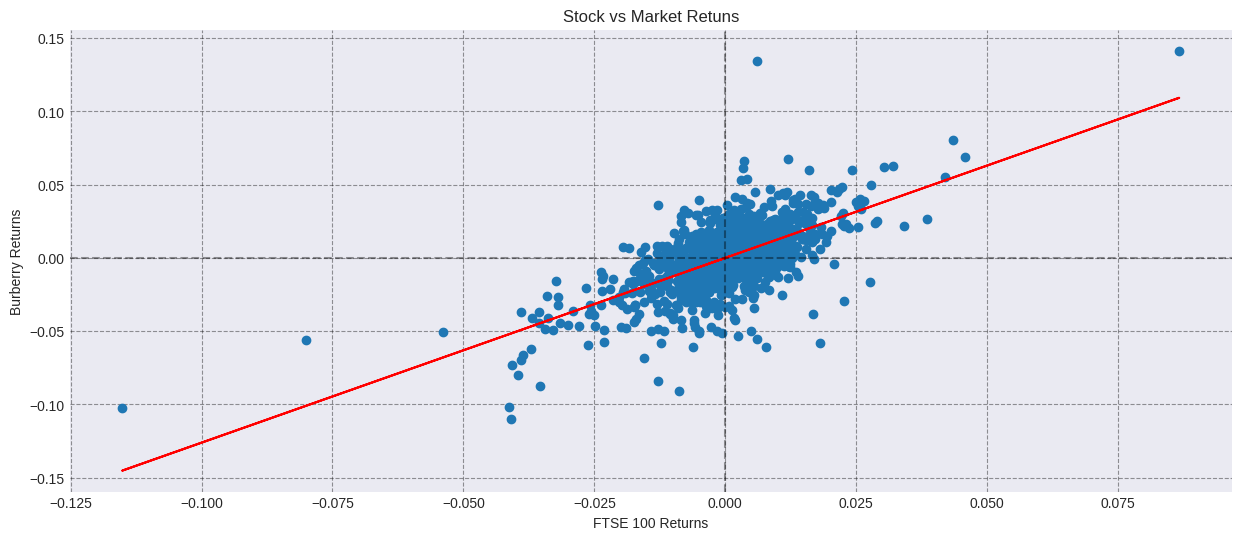

In [87]:
plt.figure(figsize=(15,6))
plt.scatter(X,y)
plt.plot(X, y_pred, color="red")
plt.title("Stock vs Market Retuns")
plt.xlabel("FTSE 100 Returns")
plt.axhline(0, color="black", linestyle="--", alpha=0.4)
plt.axvline(0, color="black", linestyle="--", alpha=0.4)
plt.ylabel("Burberry Returns")
plt.grid(True, color="black", alpha=0.4, linestyle="--")
plt.show()

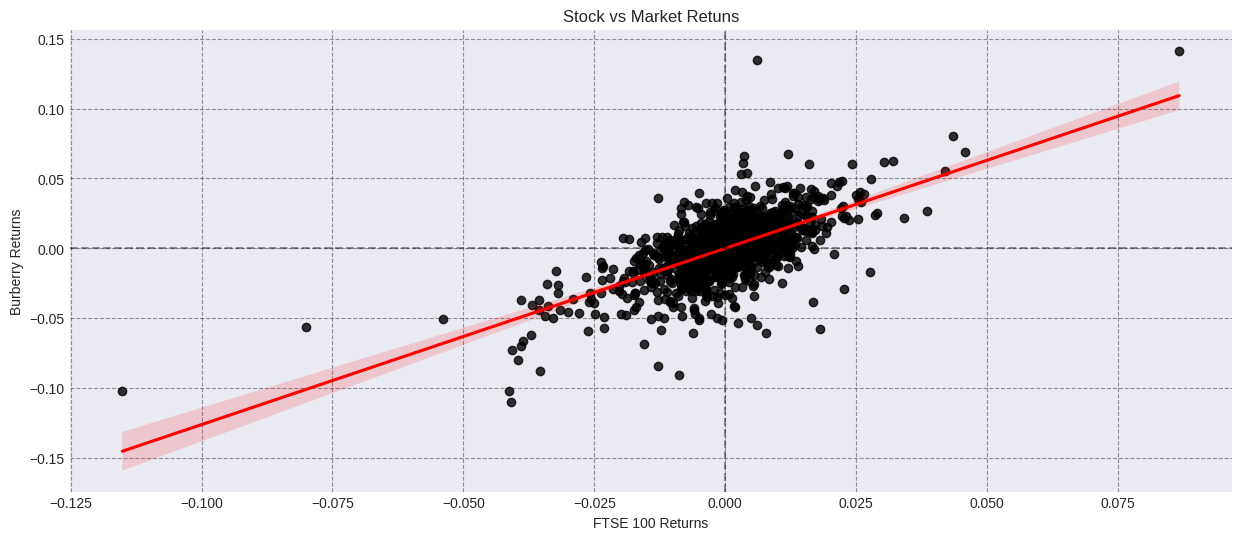

In [88]:
plt.figure(figsize=(15,6))
sns.regplot(x = "FTSE", y = "BRBY", data = returns, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title("Stock vs Market Retuns")
plt.xlabel("FTSE 100 Returns")
plt.axhline(0, color="black", linestyle="--", alpha=0.4)
plt.axvline(0, color="black", linestyle="--", alpha=0.4)
plt.ylabel("Burberry Returns")
plt.grid(True, color="black", alpha=0.4, linestyle="--")

# Portfolio Optimization

In this project, I took the 10 biggest companies in terms of market capitalization. Let's try to build an optimal investment portfolio.

In [89]:
stock_ticker = ['GOOGL', 'GOOG', 'BRK-B','META', 'NVDA', 'MSFT', 'UNH', 'AMZN', 'AAPL', 'TSLA']

In [90]:
portfolio = stock(stock_ticker, "8Y").chart()
portfolio = portfolio['Adj Close']
portfolio.head()


[*********************100%***********************]  10 of 10 completed


AAPL       AMZN       BRK-B       GOOG      GOOGL       META  \
Date                                                                            
2015-08-26  24.891590  25.038500  132.610001  31.431000  32.987000  87.190002   
2015-08-27  25.624567  25.918501  136.229996  31.880501  33.397999  89.730003   
2015-08-28  25.708527  25.900499  135.740005  31.518999  32.984501  91.010002   
2015-08-31  25.588259  25.644501  134.039993  30.912500  32.390999  89.430000   
2015-09-01  24.444544  24.827000  130.410004  29.889500  31.478001  87.230003   

                 MSFT      NVDA       TSLA         UNH  
Date                                                    
2015-08-26  37.777313  5.303753  14.989333  100.459267  
2015-08-27  38.829884  5.503158  16.199333  104.275429  
2015-08-28  38.856422  5.527478  16.565332  103.841545  
2015-08-31  38.493778  5.466682  16.604000  102.442604  
2015-09-01  36.990105  5.242956  15.908667   99.724373

In [91]:
fig = px.line(portfolio, x=portfolio.index, y=portfolio.columns, title = 'Price change of stocks in our Portfolio from Aug 2018')
fig.show()

## Volatility computation

In [92]:
stock_returns = np.log(portfolio/portfolio.shift(1))
stock_returns = stock_returns.dropna()
stock_returns

AAPL      AMZN     BRK-B      GOOG     GOOGL      META  \
Date                                                                     
2015-08-27  0.029022  0.034542  0.026932  0.014200  0.012382  0.028716   
2015-08-28  0.003271 -0.000695 -0.003603 -0.011404 -0.012458  0.014164   
2015-08-31 -0.004689 -0.009933 -0.012603 -0.019430 -0.018157 -0.017513   
2015-09-01 -0.045727 -0.032397 -0.027455 -0.033653 -0.028592 -0.024908   
2015-09-02  0.041995  0.027825  0.013784  0.027309  0.024090  0.030038   
...              ...       ...       ...       ...       ...       ...   
2023-08-21  0.007707  0.010900 -0.001334  0.006380  0.007114  0.023206   
2023-08-22  0.007874 -0.003198 -0.004326  0.005877  0.005516 -0.007965   
2023-08-23  0.021711  0.009416  0.010471  0.026780  0.025169  0.022825   
2023-08-24 -0.026519 -0.027530  0.000113 -0.021167 -0.019760 -0.025785   
2023-08-25  0.012564  0.010713  0.004590  0.002068  0.000770 -0.004369   

                MSFT      NVDA      TSLA       UNH  
Date                                                
2015-08-27  0.027481  0.036907  0.077631  0.037283  
2015-08-28  0.000683  0.004409  0.022342 -0.004170  
2015-08-31 -0.009377 -0.011060  0.002332 -0.013563  
2015-09-01 -0.039846 -0.041786 -0.042780 -0.026893  
2015-09-02  0.036163  0.029703  0.037264  0.014106  
...              ...       ...       ...       ...  
2023-08-21  0.016919  0.081316  0.070715 -0.001526  
2023-08-22  0.001800 -0.028047  0.008224 -0.010788  
2023-08-23  0.013981  0.031215  0.015616 -0.005908  
2023-08-24 -0.021733  0.000997 -0.029216 -0.002742  
2023-08-25  0.009363 -0.024577  0.036493  0.002088  

[2013 rows x 10 columns]

In [110]:
market_price = yf.download('SPY', start="2015-08-27", end="2023-08-25")["Adj Close"]
prices = pd.concat([market_price, portfolio,], axis=1)
prices.columns = ['S&P 500'] + prices.columns.tolist()[1:]
prices.columns = portfolio.columns.to_list() + prices.columns.tolist()[:1]

prices = prices.interpolate(method="nearest")
prices.tail().round(1)

returns = prices.pct_change().dropna()

stock_returns = returns.iloc[:,:-1]
market_returns = pd.Series(returns['S&P 500'])

[*********************100%***********************]  1 of 1 completed


In [111]:
fig = px.line((1+stock_returns).cumprod(), x=stock_returns.index, y=stock_returns.columns, title = 'Cumulative Returns of stocks in our Portfolio from Aug 2015')
fig.show()

We can observe that the TESLA stock have better results, so it should have a higher volatility

In [112]:
daily_vol = stock_returns.std()
monthly_vol = daily_vol*np.sqrt(21) #assuming we have 21 trading days in a month

# Annualized Volatility
annual_vol = daily_vol*np.sqrt(252)
annual_vol

AAPL     0.185539
AMZN     0.295868
BRK-B    0.331512
GOOG     0.203443
GOOGL    0.283966
META     0.283302
MSFT     0.388236
NVDA     0.280493
TSLA     0.496841
UNH      0.580138
dtype: float64

Our hypothesis was good, the TESLA stock volatility is higher than the others stock (56% for annual volatility)

We also can check the distribution of returns 

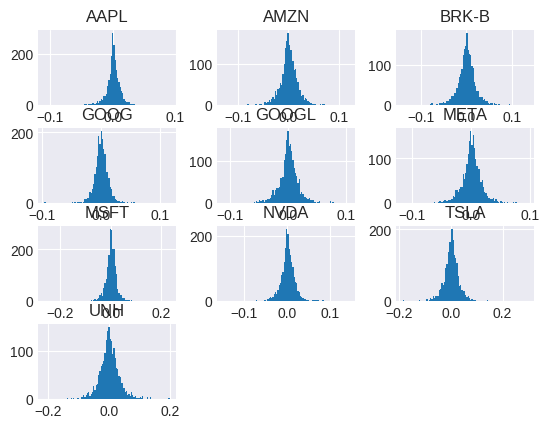

In [113]:
stock_returns.hist(bins=100)
plt.show()

All the returns seems to be normally distributed

In [114]:
stock_returns_means = stock_returns.mean()*252
stock_returns_means

AAPL     0.133741
AMZN     0.287074
BRK-B    0.259982
GOOG     0.141015
GOOGL    0.217075
META     0.210301
MSFT     0.221589
NVDA     0.304750
TSLA     0.677027
UNH      0.505010
dtype: float64

In this portfolio, we can observe that Tesla has the highest annualized returns (~48%)

## Analysis of returns

In statistics, skewness is a degree of asymmetry observed in a probability distribution that deviates from the symmetrical normal distribution (bell curve) in a given set of data.

Kurtosis is a statistical measure that quantifies the shape of a probability distribution. It provides information about the tails and peakedness of the distribution compared to a normal distribution.

Positive kurtosis indicates heavier tails and a more peaked distribution, while negative kurtosis suggests lighter tails and a flatter distribution. Kurtosis helps in analyzing the characteristics and outliers of a dataset.

https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/

Here to check is the data is normally distributed, we need to check if:
1. Excess Kurtosis = 0 (K-0=0)
2. Skewness = 0

In [115]:
summary = round(stock_returns.describe().T, 4)
#_get_numeric_data get all the numeric data in the DF
summary['Skew'] = stats.skew(stock_returns._get_numeric_data()).round(5)
summary['Kurt'] = stats.kurtosis(stock_returns._get_numeric_data()).round(5)
summary = summary.drop('count', axis=1)
summary

mean     std     min     25%     50%     75%     max     Skew  \
AAPL   0.0005  0.0117 -0.1094 -0.0037  0.0006  0.0060  0.0906 -0.55424   
AMZN   0.0011  0.0186 -0.1286 -0.0075  0.0009  0.0105  0.1198 -0.01979   
BRK-B  0.0010  0.0209 -0.1405 -0.0087  0.0012  0.0112  0.1354  0.17376   
GOOG   0.0006  0.0128 -0.0959 -0.0055  0.0005  0.0067  0.1161 -0.01790   
GOOGL  0.0009  0.0179 -0.1110 -0.0069  0.0009  0.0094  0.1045  0.00040   
META   0.0008  0.0178 -0.1163 -0.0071  0.0010  0.0096  0.0962 -0.04666   
MSFT   0.0009  0.0245 -0.2639 -0.0093  0.0010  0.0123  0.2328 -0.59459   
NVDA   0.0012  0.0177 -0.1474 -0.0068  0.0010  0.0101  0.1422  0.10445   
TSLA   0.0027  0.0313 -0.1876 -0.0125  0.0026  0.0179  0.2981  0.63678   
UNH    0.0020  0.0365 -0.2106 -0.0161  0.0013  0.0194  0.1989  0.17548   

           Kurt  
AAPL   12.62097  
AMZN    5.31456  
BRK-B   5.11148  
GOOG   10.99781  
GOOGL   4.37085  
META    4.18918  
MSFT   21.26292  
NVDA    7.44793  
TSLA    8.86028  
UNH     4.20977

1. Apple, Amazon, Berkshire, Google, Meta, Microsoft, Tesla and UnitedHealth have a negtive skewness. this means these distributions have a long left tail. Their returns are more concentrated on the rigth tail of the distribution. Investors should expect frequent small gains and some large losses 

2. All stocks feature heavy tails (kurtosis >> 0). So we can say that these stocks will potentially have more frequent high returns 

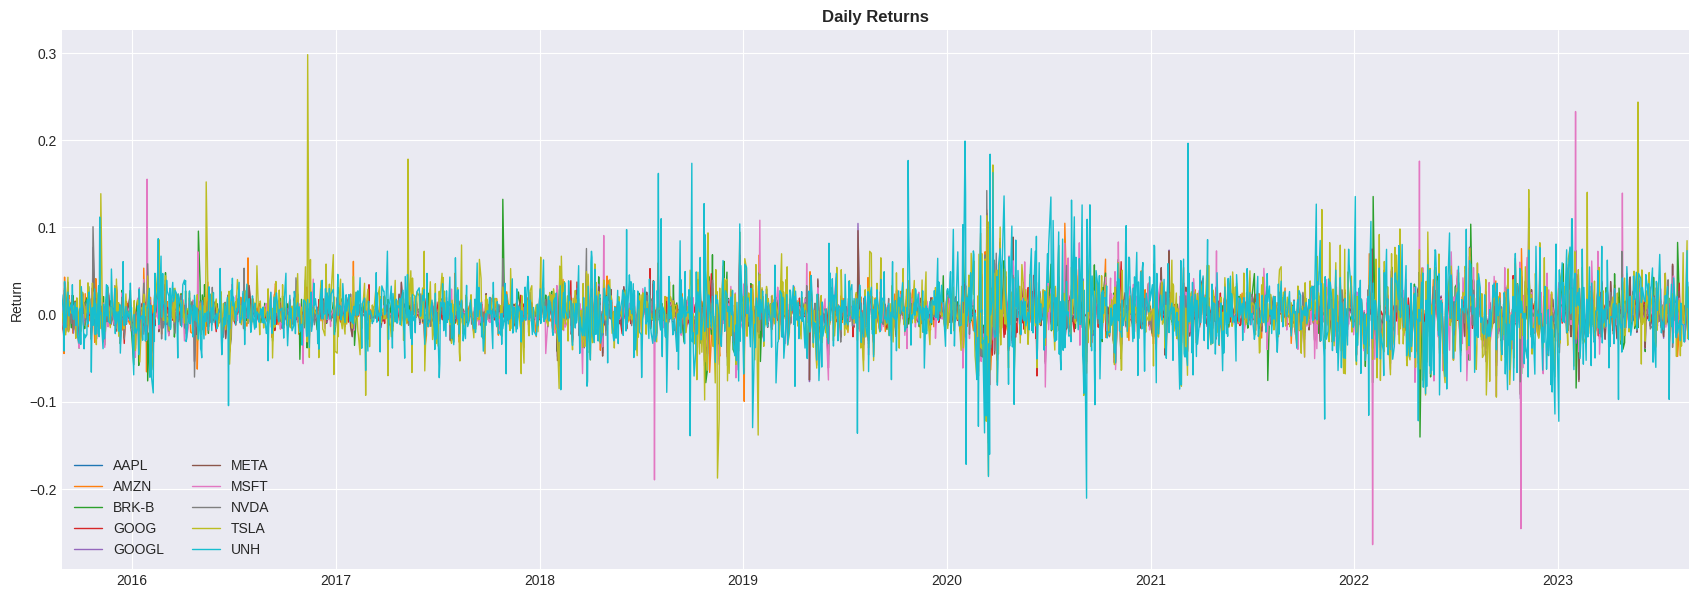

In [116]:
plt.figure(figsize=(21,7))
for col in stock_returns:
    plt.plot(stock_returns.index, stock_returns[col], marker='', linewidth=1, label=col)
    plt.legend(loc='lower left', ncol=2)
    plt.margins(x=0)
    plt.title('Daily Returns', weight='bold')
    plt.ylabel('Return')

Now let's check the Daily returns distribution

Text(0.5, 1.0, 'Daily returns distribution')

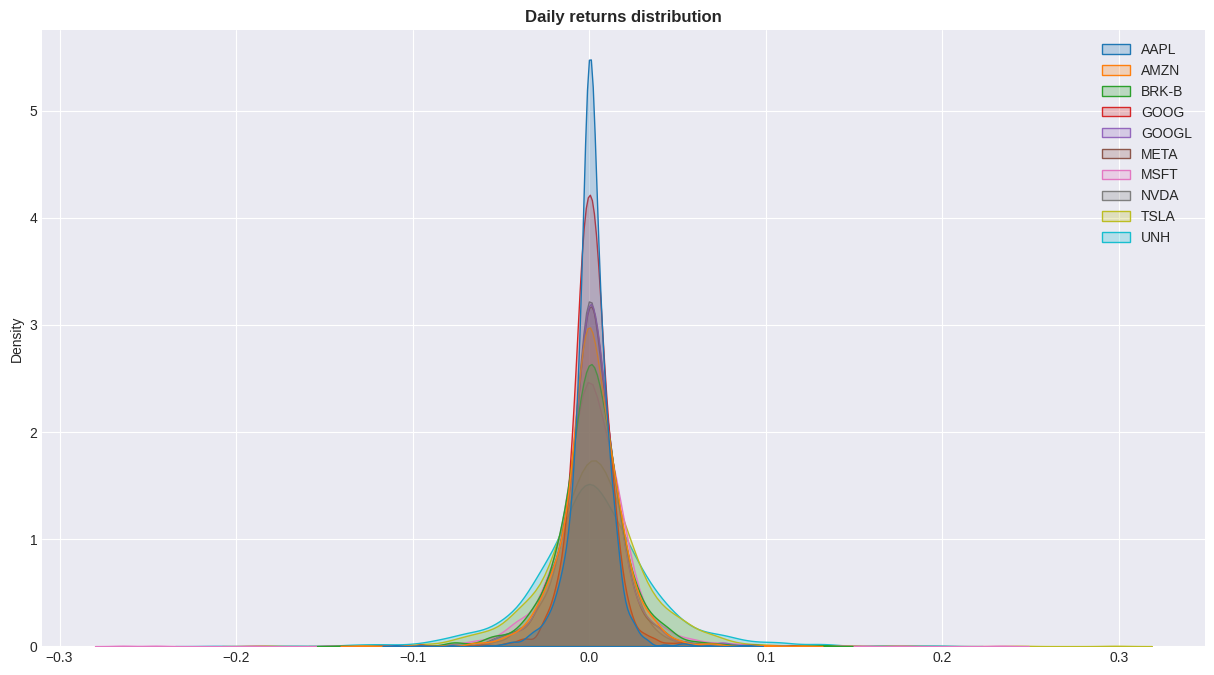

In [117]:
fig = plt.figure(figsize=(15,8))
sns.kdeplot(data=stock_returns, fill=True)
plt.title('Daily returns distribution', weight='bold')

Text(0.5, 1.0, 'Daily returns distribution')

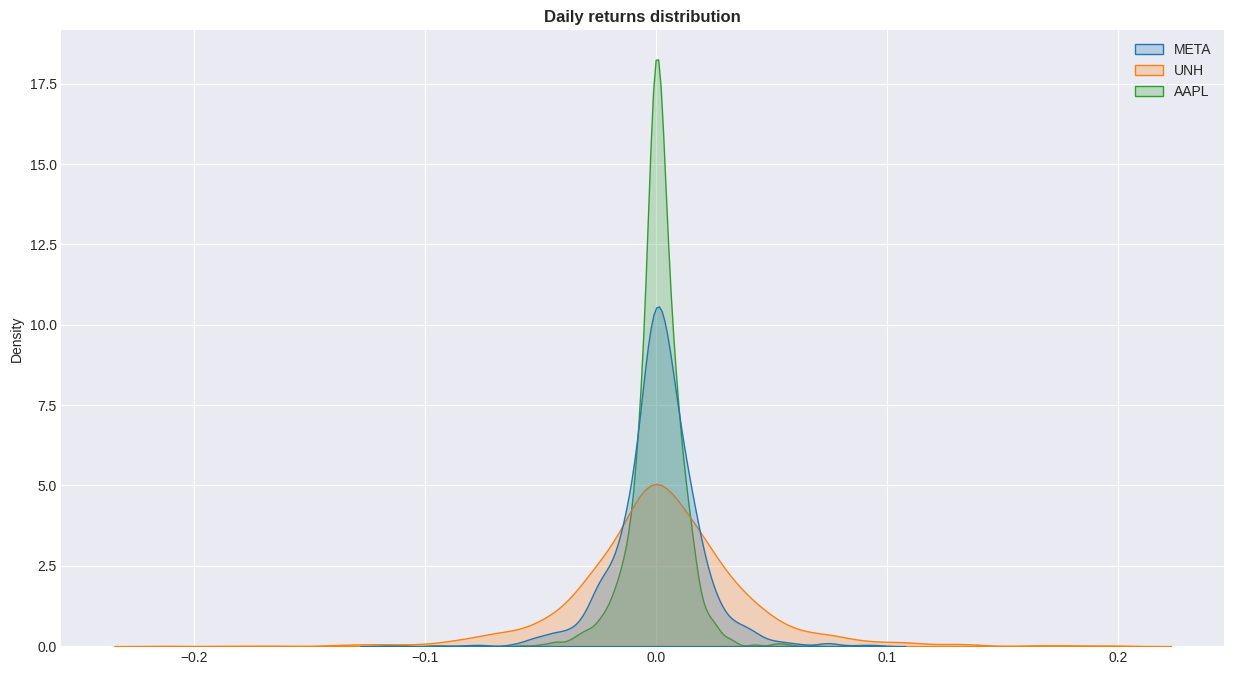

In [118]:
fig = plt.figure(figsize=(15,8))
sns.kdeplot(data=stock_returns[['META','UNH', 'AAPL']], fill=True)
plt.title('Daily returns distribution', weight='bold')

As we said earlier, META or UNH have heavier tails, or wider distribution. This means these stocks have an higher volatility associated.

In [119]:
dates_ret_min_max = pd.DataFrame({'Min Return': stock_returns.idxmin(),
'Max Return': stock_returns.idxmax()})
dates_ret_min_max

Min Return Max Return
AAPL  2020-03-16 2020-03-24
AMZN  2020-03-16 2020-03-13
BRK-B 2022-04-29 2022-02-04
GOOG  2020-03-12 2020-03-13
GOOGL 2020-03-16 2019-07-26
META  2020-03-16 2019-07-26
MSFT  2022-02-03 2023-02-02
NVDA  2020-03-16 2020-03-13
TSLA  2018-11-16 2016-11-11
UNH   2020-09-08 2020-02-03

For all these stocks, they have been at the lowest and the highest position around 2020 at the most part. It could be correlated to an high volatiity during Covid-19.

Let's compute the Sharpe Ratio now which compares the return of an investment with its risk.

The Sharpe ratio divides a portfolio's excess returns by a measure of its volatility to assess risk-adjusted performance

Excess returns are those above an industry benchmark or the risk-free rate of return

A Sharpe ratio of 1.5 indicates that the investment is generating 1.5 units of excess return for each unit of risk taken, relative to the risk-free rate. Generally speaking, a Sharpe ratio between 1 and 2 is considered good.

$$sharpe\_ratio = \frac{R_{p}-R_{f}}{\sigma_{p}}$$ where $R_{f}$ is the risk-free rate.\
https://www.investopedia.com/terms/s/sharperatio.asp

In [120]:
ret_stats = stock_returns.agg(['mean','std']).T
ret_stats.columns=['Return','Risk']
ret_stats['Return'] = ret_stats['Return']*252
ret_stats['Risk'] = ret_stats['Risk']*np.sqrt(252)
#Rf come from the risk-free rate for 10Y US bond
ret_stats['Sharpe_Ratio']=(ret_stats['Return']-0.0434)/ret_stats['Risk']
ret_stats = ret_stats.sort_values('Sharpe_Ratio', ascending=False)
ret_stats

Return      Risk  Sharpe_Ratio
TSLA   0.677027  0.496841      1.275310
NVDA   0.304750  0.280493      0.931754
AMZN   0.287074  0.295868      0.823591
UNH    0.505010  0.580138      0.795691
BRK-B  0.259982  0.331512      0.653316
GOOGL  0.217075  0.283966      0.611603
META   0.210301  0.283302      0.589127
AAPL   0.133741  0.185539      0.486914
GOOG   0.141015  0.203443      0.479814
MSFT   0.221589  0.388236      0.458971

Tesla has a high sharpe ratio which means that 1 unit of risk, the excess the investment provide 1 unit of return. 

Let's plot all these informations 

Text(0.5, 1.0, 'Risk-Return Profile')

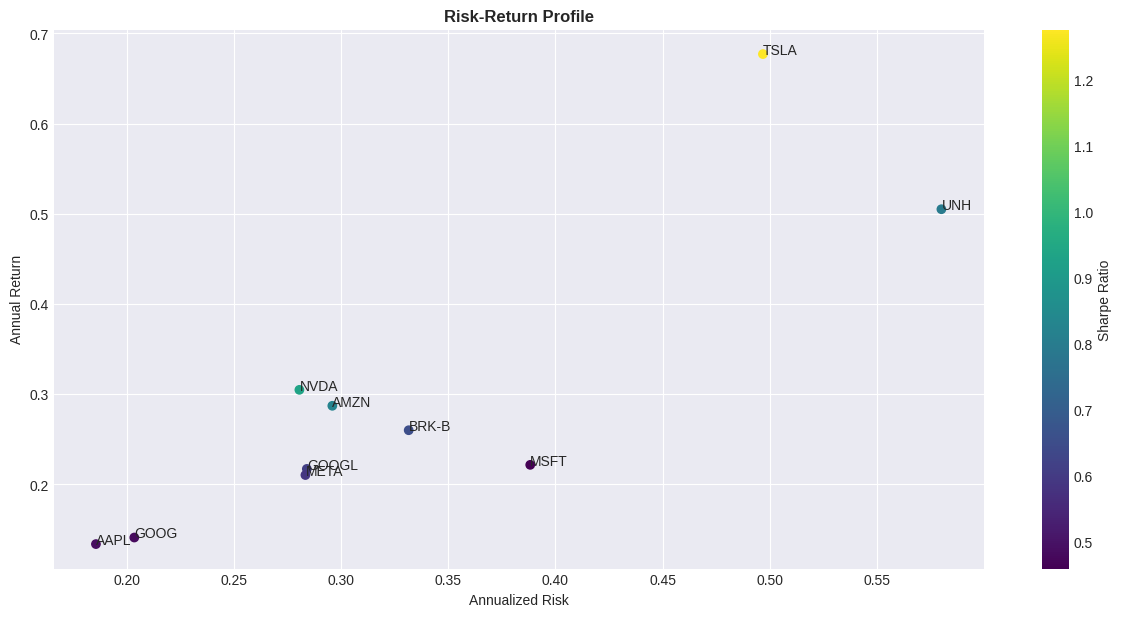

In [127]:
fig = plt.figure(figsize=(15,7))
plt.scatter(data=ret_stats,x='Risk',y='Return', c='Sharpe_Ratio', cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
labels = []
for x, y, s in zip(ret_stats['Risk'], ret_stats['Return'], ret_stats.index):
    labels.append(plt.text(x,y,s))

plt.xlabel('Annualized Risk')
plt.ylabel('Annual Return')
plt.title('Risk-Return Profile', weight='bold')

### Measuring stock volatility with Beta

The beta coefficient measures the volatility of a security (or portfolio) compared to the systematic risk of the entire market(see upper). It describes how security's returns responds to swings on the market 

In [128]:
betas = []
for i in range(len(stock_returns.columns)):
    beta = np.polyfit(market_returns, stock_returns.iloc[:,i], 1)[0]
    betas.append(beta)
    
betas = pd.DataFrame(betas, columns=['Beta'], index=portfolio.columns)
betas = betas.sort_values('Beta', ascending=False)
betas.round(3)

Beta
TSLA   0.605
NVDA   0.509
AMZN   0.491
UNH    0.465
META   0.454
GOOGL  0.453
AAPL   0.437
GOOG   0.418
MSFT   0.405
BRK-B  0.382

Here all the stocks has a lower volatility than the market, because $\beta < 1$.

So in conclusion, the inclusion of each one of them in a portfolio makes it less risky than the same portfolio without this stock.

#### Cumulative daily returns

In [129]:
# As the growth of $1
cum_returns = ((1 + stock_returns).cumprod()-1)*100

In [143]:
ticker_change = cum_returns.tail(1).round(3)
ticker_change

AAPL     AMZN   BRK-B     GOOG    GOOGL     META     MSFT  \
Date                                                                       
2023-08-25  153.342  597.026  414.15  161.271  309.937  288.886  218.177   

               NVDA      TSLA       UNH  
Date                                     
2023-08-25  731.782  8262.107  1372.838

We can obvserve than Tesla has the highest growth during the last 8 years, with a rate of change greather than 8000%

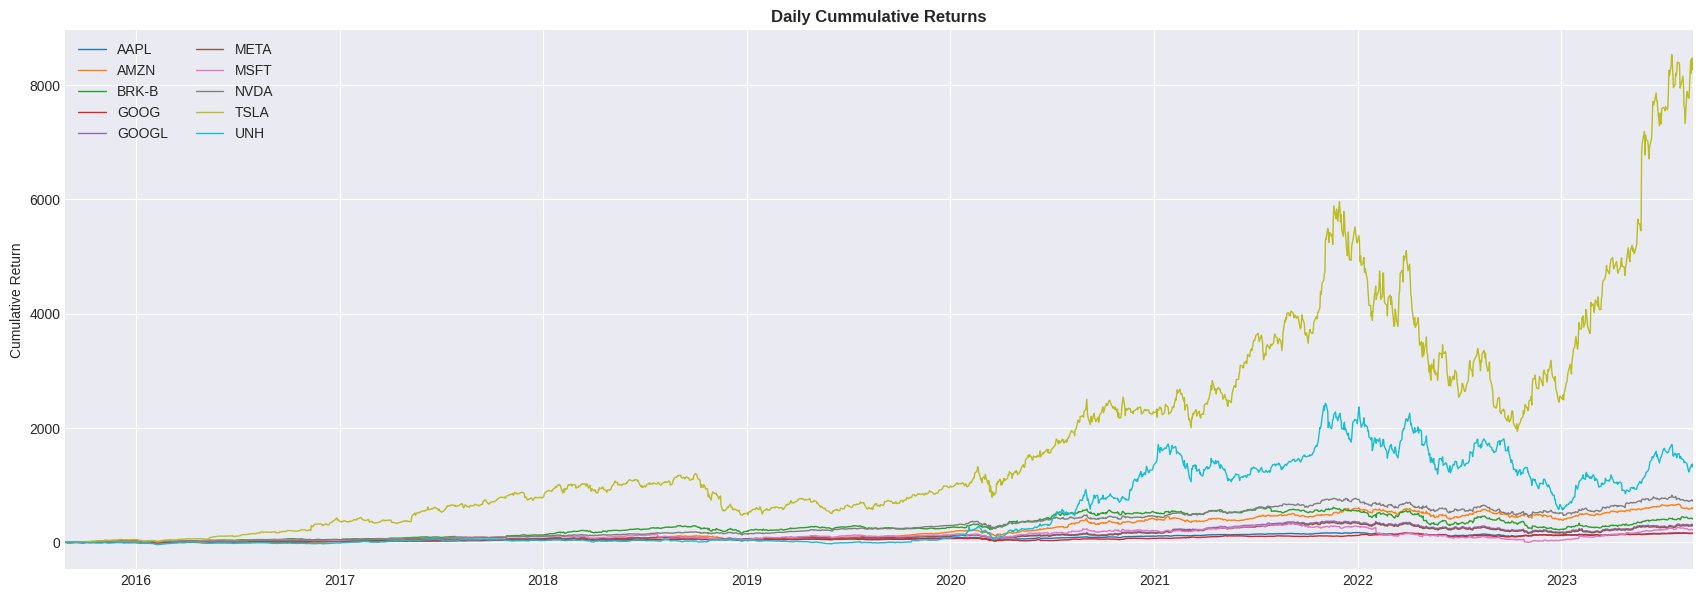

In [145]:
# Plotting daily cumulative returns
plt.figure(figsize=(21,7))
for col in cum_returns:
    plt.plot(cum_returns.index, cum_returns[col], marker='', linewidth=1, label=col)
    plt.legend(loc='upper left', ncol=2)
    plt.margins(x=0)
    plt.title('Daily Cummulative Returns', weight='bold')
    plt.ylabel('Cumulative Return')

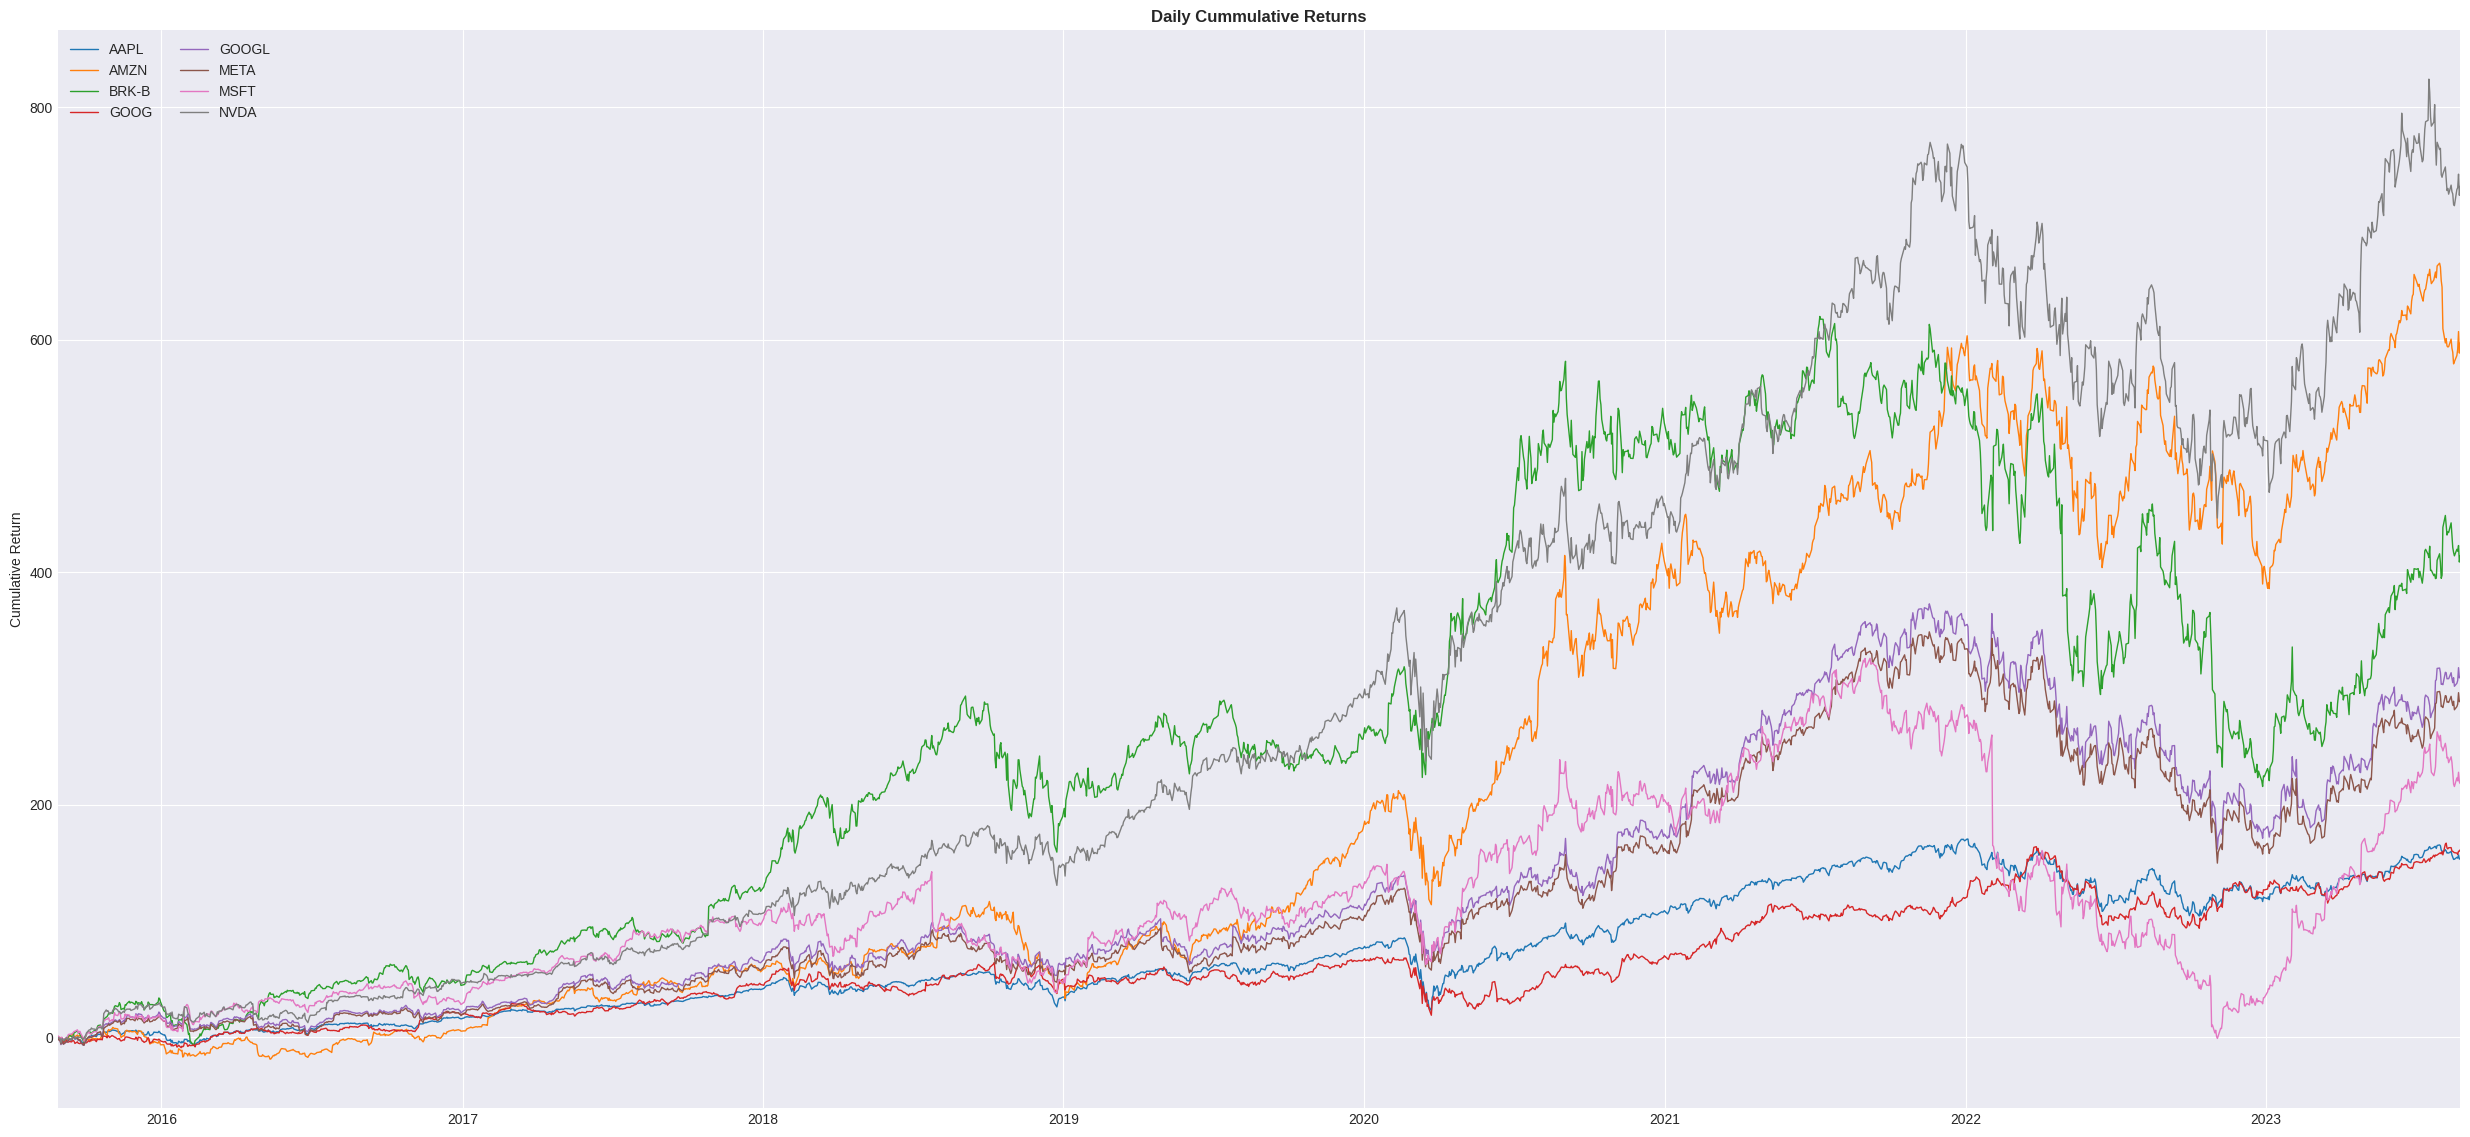

In [149]:
# Same without Tesla and unh 
cum_returns_bis = cum_returns.drop(columns=['TSLA', 'UNH'])
plt.figure(figsize=(21,7))
for col in cum_returns_bis:
    plt.plot(cum_returns.index, cum_returns[col], marker='', linewidth=1, label=col)
    plt.legend(loc='upper left', ncol=2)
    plt.margins(x=0)
    plt.title('Daily Cummulative Returns', weight='bold')
    plt.ylabel('Cumulative Return')

We can easily observe around 2019, the cumulative returns declined during Covid-19 shock.

### Calculation Drawdown

The drawdown refers to how much an investment or trading account is down from the peak before it recovers back to the peak.

For example, if a trading account has $\$10,000$ in it, and the funds drop to $\$9,000$ before moving back above $\$10,000$, then the trading account witnessed a 10\% drawdown.(source: https://www.investopedia.com/terms/d/drawdown.asp)

A dropdown is an important risk factor.

In [150]:
def drawdown_computation(return_series):
    wealth_index = 1000*(1+return_series).cumprod()
    prev_peaks = wealth_index.cummax()
    drawdown = (wealth_index - prev_peaks)/prev_peaks
    return drawdown.min(), drawdown

In [151]:
min_drawdown, drawdown = drawdown_computation(stock_returns)
drawdown.min()

AAPL    -0.337172
AMZN    -0.385159
BRK-B   -0.561453
GOOG    -0.295699
GOOGL   -0.446018
META    -0.443201
MSFT    -0.767361
NVDA    -0.371485
TSLA    -0.663351
UNH     -0.736322
dtype: float64

<Axes: xlabel='Date'>

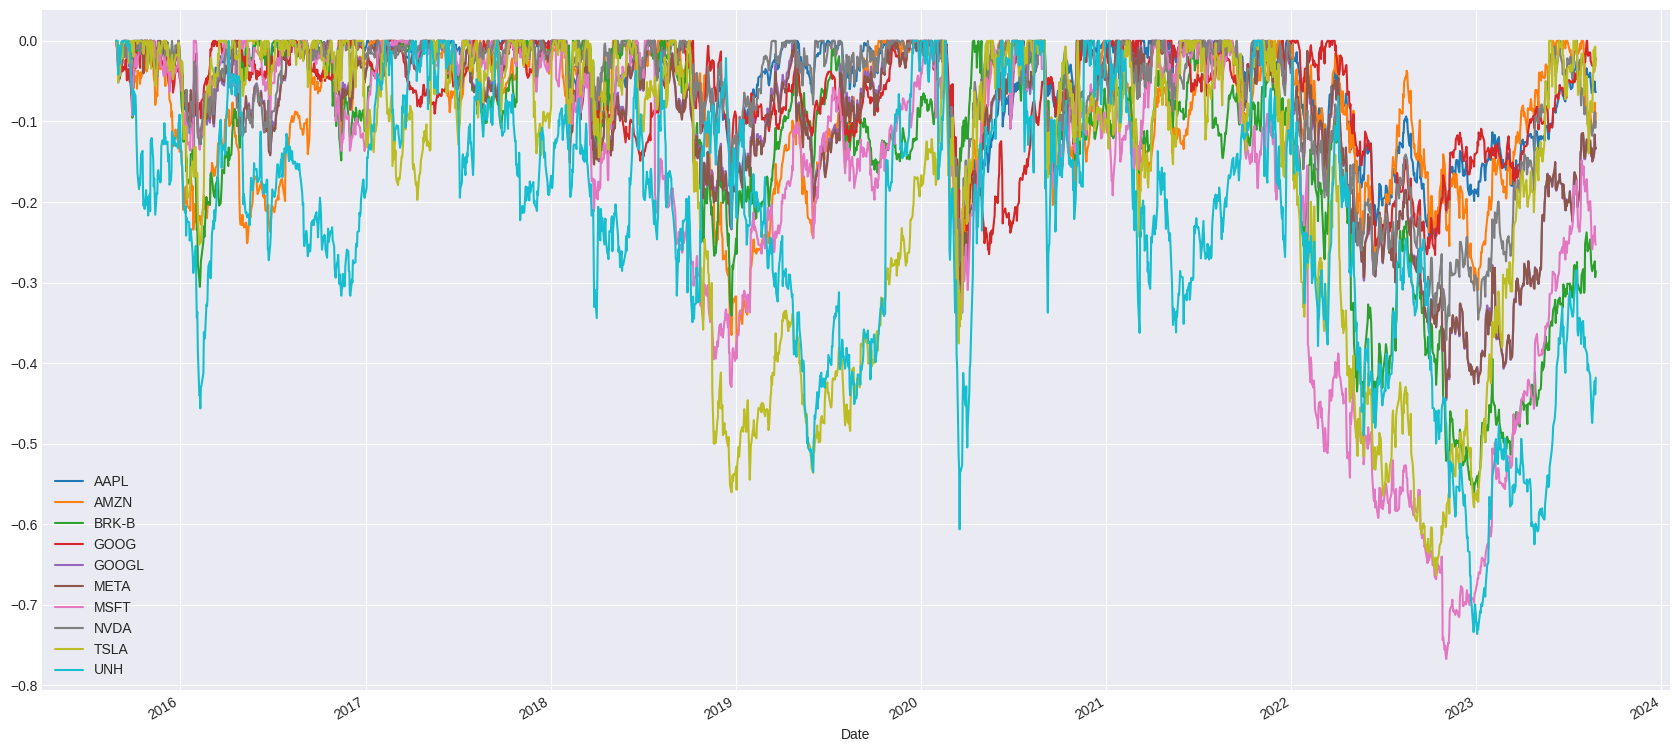

In [152]:
drawdown.plot(figsize = (21,10))

### Correlation and Covariance matrices

In [154]:
corr_mat = stock_returns.corr()
corr_mat

AAPL      AMZN     BRK-B      GOOG     GOOGL      META      MSFT  \
AAPL   1.000000  0.768289  0.638441  0.810210  0.755373  0.757952  0.610873   
AMZN   0.768289  1.000000  0.594021  0.542071  0.653362  0.654183  0.552485   
BRK-B  0.638441  0.594021  1.000000  0.376419  0.673976  0.670885  0.607436   
GOOG   0.810210  0.542071  0.376419  1.000000  0.525214  0.524428  0.380630   
GOOGL  0.755373  0.653362  0.673976  0.525214  1.000000  0.993614  0.665975   
META   0.757952  0.654183  0.670885  0.524428  0.993614  1.000000  0.667256   
MSFT   0.610873  0.552485  0.607436  0.380630  0.665975  0.667256  1.000000   
NVDA   0.814260  0.713829  0.679861  0.561436  0.768274  0.769041  0.597220   
TSLA   0.645956  0.576981  0.540955  0.408377  0.572156  0.575691  0.492237   
UNH    0.468026  0.439613  0.409861  0.272059  0.390007  0.391640  0.336761   

           NVDA      TSLA       UNH  
AAPL   0.814260  0.645956  0.468026  
AMZN   0.713829  0.576981  0.439613  
BRK-B  0.679861  0.540955  0.409861  
GOOG   0.561436  0.408377  0.272059  
GOOGL  0.768274  0.572156  0.390007  
META   0.769041  0.575691  0.391640  
MSFT   0.597220  0.492237  0.336761  
NVDA   1.000000  0.632012  0.423748  
TSLA   0.632012  1.000000  0.434876  
UNH    0.423748  0.434876  1.000000

Text(0.5, 1.0, 'Correlation heatmap')

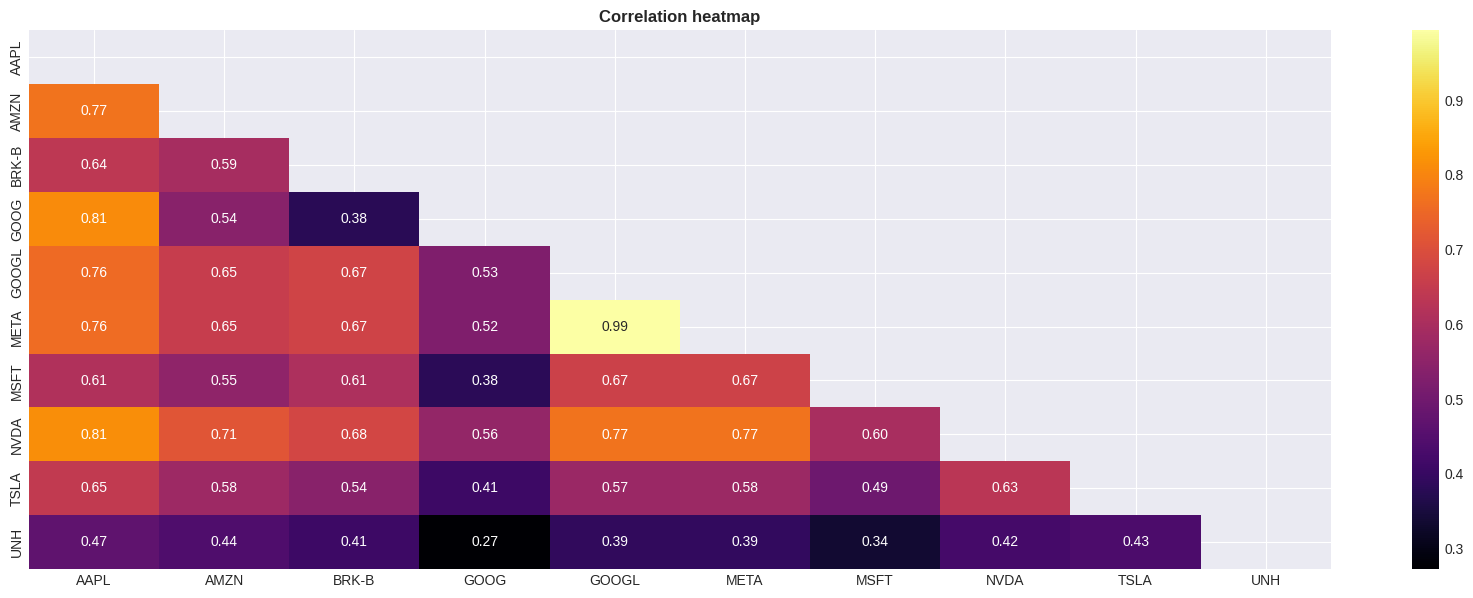

In [155]:
plt.figure(figsize=(21,7))
mask = np.triu(np.ones_like(stock_returns.corr(), dtype=bool))
my_cap = sns.diverging_palette(10, 220, sep=80, n=50)
sns.heatmap(stock_returns.corr(), mask=mask, annot=True, fmt=".02f", cmap='inferno')
plt.title('Correlation heatmap', weight='bold')

We can notice than Apple is mostly correlated with all the other stocks.

Moreover, Meta and Google are highly correlated, due to the similar and linked services they propose.

In [157]:
# Annual Covariance matrix 
cov_matrix = stock_returns.cov(numeric_only=True)*252
cov_matrix.round(3)

AAPL   AMZN  BRK-B   GOOG  GOOGL   META   MSFT   NVDA   TSLA    UNH
AAPL   0.034  0.042  0.039  0.031  0.040  0.040  0.044  0.042  0.060  0.050
AMZN   0.042  0.088  0.058  0.033  0.055  0.055  0.063  0.059  0.085  0.075
BRK-B  0.039  0.058  0.110  0.025  0.063  0.063  0.078  0.063  0.089  0.079
GOOG   0.031  0.033  0.025  0.041  0.030  0.030  0.030  0.032  0.041  0.032
GOOGL  0.040  0.055  0.063  0.030  0.081  0.080  0.073  0.061  0.081  0.064
META   0.040  0.055  0.063  0.030  0.080  0.080  0.073  0.061  0.081  0.064
MSFT   0.044  0.063  0.078  0.030  0.073  0.073  0.151  0.065  0.095  0.076
NVDA   0.042  0.059  0.063  0.032  0.061  0.061  0.065  0.079  0.088  0.069
TSLA   0.060  0.085  0.089  0.041  0.081  0.081  0.095  0.088  0.247  0.125
UNH    0.050  0.075  0.079  0.032  0.064  0.064  0.076  0.069  0.125  0.337

# Portfolio optimization